Animaciones
===========

**Date:** 2022-03-30



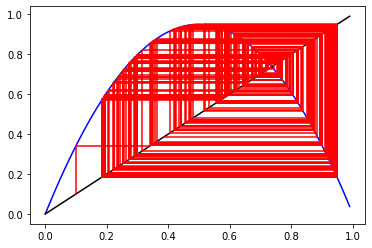

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML

def diagrama(par, x0, it):
    def f(x):
        return par*x*(1-x)
    fig, ax = plt.subplots()
    camera = Camera(fig)
    x = [x0]
    y = [x0]
    s = np.arange(0, 1, 0.01)

    for i in range(it):
        ax.plot(s, f(s), color='blue')
        ax.plot(s, s, color='black')
        x.append(x[2*i])
        x.append(f(x[2*i]))
        y.append(f(y[2*i]))
        y.append(f(y[2*i]))
        ax.plot(x, y, color='red')
        camera.snap()
    return camera.animate()

anim = diagrama(3.8, 0.1, 200)

HTML(anim.to_html5_video())

In [2]:
#definiendo excepciones de la siguiente funciones 
class FunctionNotAllowed(Exception):
    def __init__(self, mensaje="No indicaste un sistema dinámico entre las opciones permitidas"):
        super().__init__(mensaje)

class ParameterError(Exception):
    def __init__(self, mensaje="No indicaste el parámetro para el sistema"):
        super().__init__(mensaje)

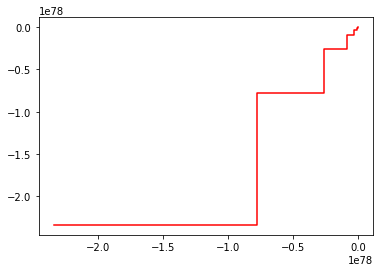

In [21]:
import numpy as np

from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML

def diagrama(x0, it, **dic_extra):
    if dic_extra:
        if dic_extra['system']=="logistic map":
            try:
                #return f"{dic_extra['parametro']}"
                def f(x):
                    return dic_extra['parametro']*x*(1-x)
                fig, ax = plt.subplots()
                camera = Camera(fig)
                x = [x0]
                y = [x0]
                s = np.arange(0, 1, 0.01)

                for i in range(it):
                    ax.plot(s, f(s), color='blue')
                    ax.plot(s, s, color='black')
                    x.append(x[2*i])
                    x.append(f(x[2*i]))
                    y.append(f(y[2*i]))
                    y.append(f(y[2*i]))
                    ax.plot(x, y, color='red')
                    camera.snap()
                return camera.animate()
            except KeyError:
                raise ParameterError
        elif dic_extra['system']=="dyadic map":
            #return "Si es la diadica"
            def f_1(x):
                return 2*x
            def f_2(x):
                return 2*x-1
            fig, ax = plt.subplots()
            camera = Camera(fig)
            x = [x0]
            y = [x0]
            s = np.arange(0, 0.49, 0.01)
            t = np.arange(0.5, 0.99, 0.01)
            r = np.arange(0, 0.99, 0.01)

            for i in range(it):
                ax.plot(s, f_1(s), color='blue')
                ax.plot(t, f_2(t), color='blue')
                ax.plot(r, r, color='black')
                if x[-1]<0.5:
                    x.append(x[2*i])
                    x.append(f_1(x[2*i]))
                    y.append(f_1(y[2*i]))
                    y.append(f_1(y[2*i]))
                else:
                    x.append(x[2*i])
                    x.append(f_2(x[2*i]))
                    y.append(f_2(y[2*i]))
                    y.append(f_2(y[2*i]))
                ax.plot(x, y, color='red')
                camera.snap()
            return camera.animate()
        elif dic_extra['system']=="tent map":
            #la pendiente siempre debe de estar entre 0 y 2 
            try:
                #return f"{dic_extra['slope']}"
                def f_1(x):
                    return dic_extra['slope']*x
                def f_2(x):
                    return dic_extra['slope']*(1-x)
                fig, ax = plt.subplots()
                camera = Camera(fig)
                x = [x0]
                y = [x0]
                s = np.arange(0, 0.5, 0.001)
                t = np.arange(0.5, 1, 0.001)
                r = np.arange(0, 1, 0.001)

                for i in range(it):
                    ax.plot(s, f_1(s), color='blue')
                    ax.plot(t, f_2(t), color='blue')
                    ax.plot(r, r, color='black')
                    if x[-1]<0.5:
                        x.append(x[2*i])
                        x.append(f_1(x[2*i]))
                        y.append(f_1(y[2*i]))
                        y.append(f_1(y[2*i]))
                    else:
                        x.append(x[2*i])
                        x.append(f_2(x[2*i]))
                        y.append(f_2(y[2*i]))
                        y.append(f_2(y[2*i]))
                    ax.plot(x, y, color='red')
                    camera.snap()
                return camera.animate()
            except KeyError:
                raise ParameterError
        else: 
            #excepción de que no es una de las funciones permitidas
            raise FunctionNotAllowed
    else:
        #excepción de que no es una de las funciones permitidas 
        raise FunctionNotAllowed


#anim = diagrama(0.1, 200, system="dyadic map")

anim = diagrama(0.1, 200, system="tent map", slope=1.5)

HTML(anim.to_html5_video())

In [6]:
#diagrama(0.3, 10, system="logistic map", parametro=8)
#diagrama(0.3, 10, system="logistic map")
#diagrama(0.3, 10, system="dyadic map")
#diagrama(0.3, 10, system="tent map", slope=0.2)
#diagrama(0.3, 10, system="tent map")
#diagrama(0.3, 10, system="rochis")
#diagrama(0.3, 10)

4

última versión de la tarea :3

In [ ]:
#definiendo excepciones de la siguiente funciones 
class FunctionNotAllowed(Exception):
    def __init__(self, mensaje="Do not indicate a dynamic system between the options allowed"):
        super().__init__(mensaje)

class ParameterError(Exception):
    def __init__(self, mensaje="Do not indicate the parameter for the system"):
        super().__init__(mensaje)
        
class SlopeError(Exception):
    def __init__(self, mensaje="The value of the parameter is out of the allowed values"):
        super().__init__(mensaje)

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML

def diagrama(x0, it, **dic_extra):
    """Función que anima la elaboración del diagrama de telaraña de un sistema dinámico dada una de las tres opciones"""
    if dic_extra:
        if dic_extra['system']=="logistic map":
            try:
                def f(x):
                    return dic_extra['parameter']*x*(1-x)
                fig, ax = plt.subplots()
                camera = Camera(fig)
                x = [x0]
                y = [x0]
                s = np.arange(0, 1, 0.01)

                for i in range(it):
                    ax.plot(s, f(s), color='blue')
                    ax.plot(s, s, color='black')
                    x.append(x[2*i])
                    x.append(f(x[2*i]))
                    y.append(f(y[2*i]))
                    y.append(f(y[2*i]))
                    ax.plot(x, y, color='red')
                    camera.snap()
                return camera.animate()
            except KeyError:
                raise ParameterError
        elif dic_extra['system']=="dyadic map":
            def f_1(x):
                return 2*x
            def f_2(x):
                return 2*x-1
            fig, ax = plt.subplots()
            camera = Camera(fig)
            x = [x0]
            y = [x0]
            s = np.arange(0, 0.49, 0.01)
            t = np.arange(0.5, 0.99, 0.01)
            r = np.arange(0, 0.99, 0.01)

            for i in range(it):
                ax.plot(s, f_1(s), color='blue')
                ax.plot(t, f_2(t), color='blue')
                ax.plot(r, r, color='black')
                if x[-1]<0.5:
                    x.append(x[2*i])
                    x.append(f_1(x[2*i]))
                    y.append(f_1(y[2*i]))
                    y.append(f_1(y[2*i]))
                else:
                    x.append(x[2*i])
                    x.append(f_2(x[2*i]))
                    y.append(f_2(y[2*i]))
                    y.append(f_2(y[2*i]))
                ax.plot(x, y, color='red')
                camera.snap()
            return camera.animate()
        elif dic_extra['system']=="tent map":
            #el parámetro siempre debe de estar entre 0 y 2 
            try:
                if 0<= dic_extra['parameter'] <= 2: 
                    def f_1(x):
                        return dic_extra['parameter']*x
                    def f_2(x):
                        return dic_extra['parameter']*(1-x)
                    fig, ax = plt.subplots()
                    camera = Camera(fig)
                    x = [x0]
                    y = [x0]
                    s = np.arange(0, 0.5, 0.001)
                    t = np.arange(0.5, 1, 0.001)
                    r = np.arange(0, 1, 0.001)

                    for i in range(it):
                        ax.plot(s, f_1(s), color='blue')
                        ax.plot(t, f_2(t), color='blue')
                        ax.plot(r, r, color='black')
                        if x[-1]<0.5:
                            x.append(x[2*i])
                            x.append(f_1(x[2*i]))
                            y.append(f_1(y[2*i]))
                            y.append(f_1(y[2*i]))
                        else:
                            x.append(x[2*i])
                            x.append(f_2(x[2*i]))
                            y.append(f_2(y[2*i]))
                            y.append(f_2(y[2*i]))
                        ax.plot(x, y, color='red')
                        camera.snap()
                    return camera.animate()
                else:
                    raise SlopeError
            except KeyError:
                raise ParameterError
        else: 
            #excepción de que no es una de las funciones permitidas
            raise FunctionNotAllowed
    else:
        #excepción de que no es una de las funciones permitidas 
        raise FunctionNotAllowed


#anim = diagrama(0.1, 200, system="logistic map", parameter=3.8)
#anim = diagrama(0.1, 200, system="dyadic map")
#anim = diagrama(0.1, 200, system="tent map", parameter=2.1)
#anim = diagrama(0.1, 200, system="logistic map")
#anim = diagrama(0.1, 200, system="tent map")
anim = diagrama(0.1, 200)

HTML(anim.to_html5_video())